In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/Users/aerryjoop/Downloads/avocado.csv")

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.shape

(18249, 14)

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].apply(lambda x:x.day)

In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [9]:
df.drop(['Unnamed: 0', 'Date', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1,inplace=True)

In [10]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11,29


In [11]:
df.shape

(18249, 10)

In [12]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,2018.000000,12.000000,31.000000


In [13]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [15]:
df.isnull().sum().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

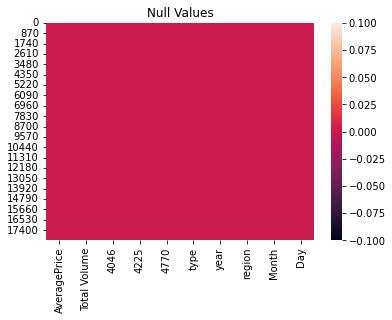

In [16]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

In [17]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(18249, 10)

In [20]:
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [21]:
df.loc[df['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day


In [22]:
df_cc=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        df_cc.append(i)
print(df_cc)

['type', 'region']


In [23]:
df_nc=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        df_nc.append(i)
print(df_nc)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'year', 'Month', 'Day']


In [24]:
df_nc = df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'year', 'Month', 'Day']].copy()

In [25]:
df_nc.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'year', 'Month',
       'Day'],
      dtype='object')

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


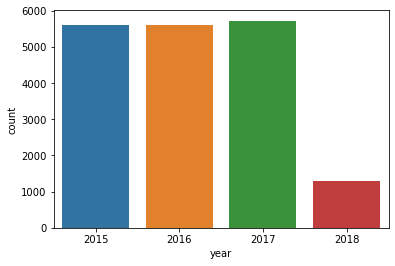

In [26]:
ax = sns.countplot(x="year",data=df)
print(df["year"].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64


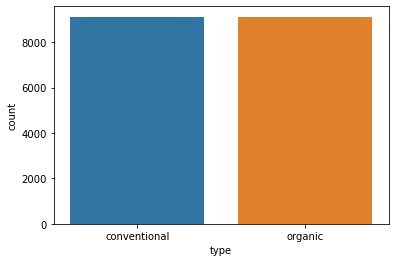

In [27]:
ax = sns.countplot(x="type",data=df)
print(df["type"].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

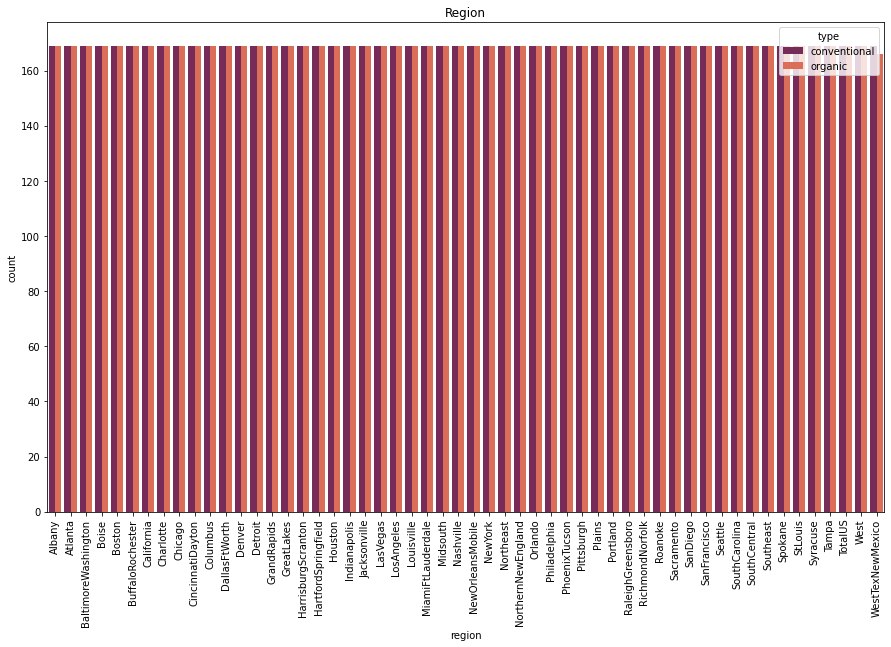

In [28]:
plt.figure(figsize=(15,9))
ax = sns.countplot(df["region"],palette="rocket",hue=df['type'])
plt.title("Region")
plt.xticks(rotation=90)
print(df["region"].value_counts())

<Figure size 1800x1800 with 0 Axes>

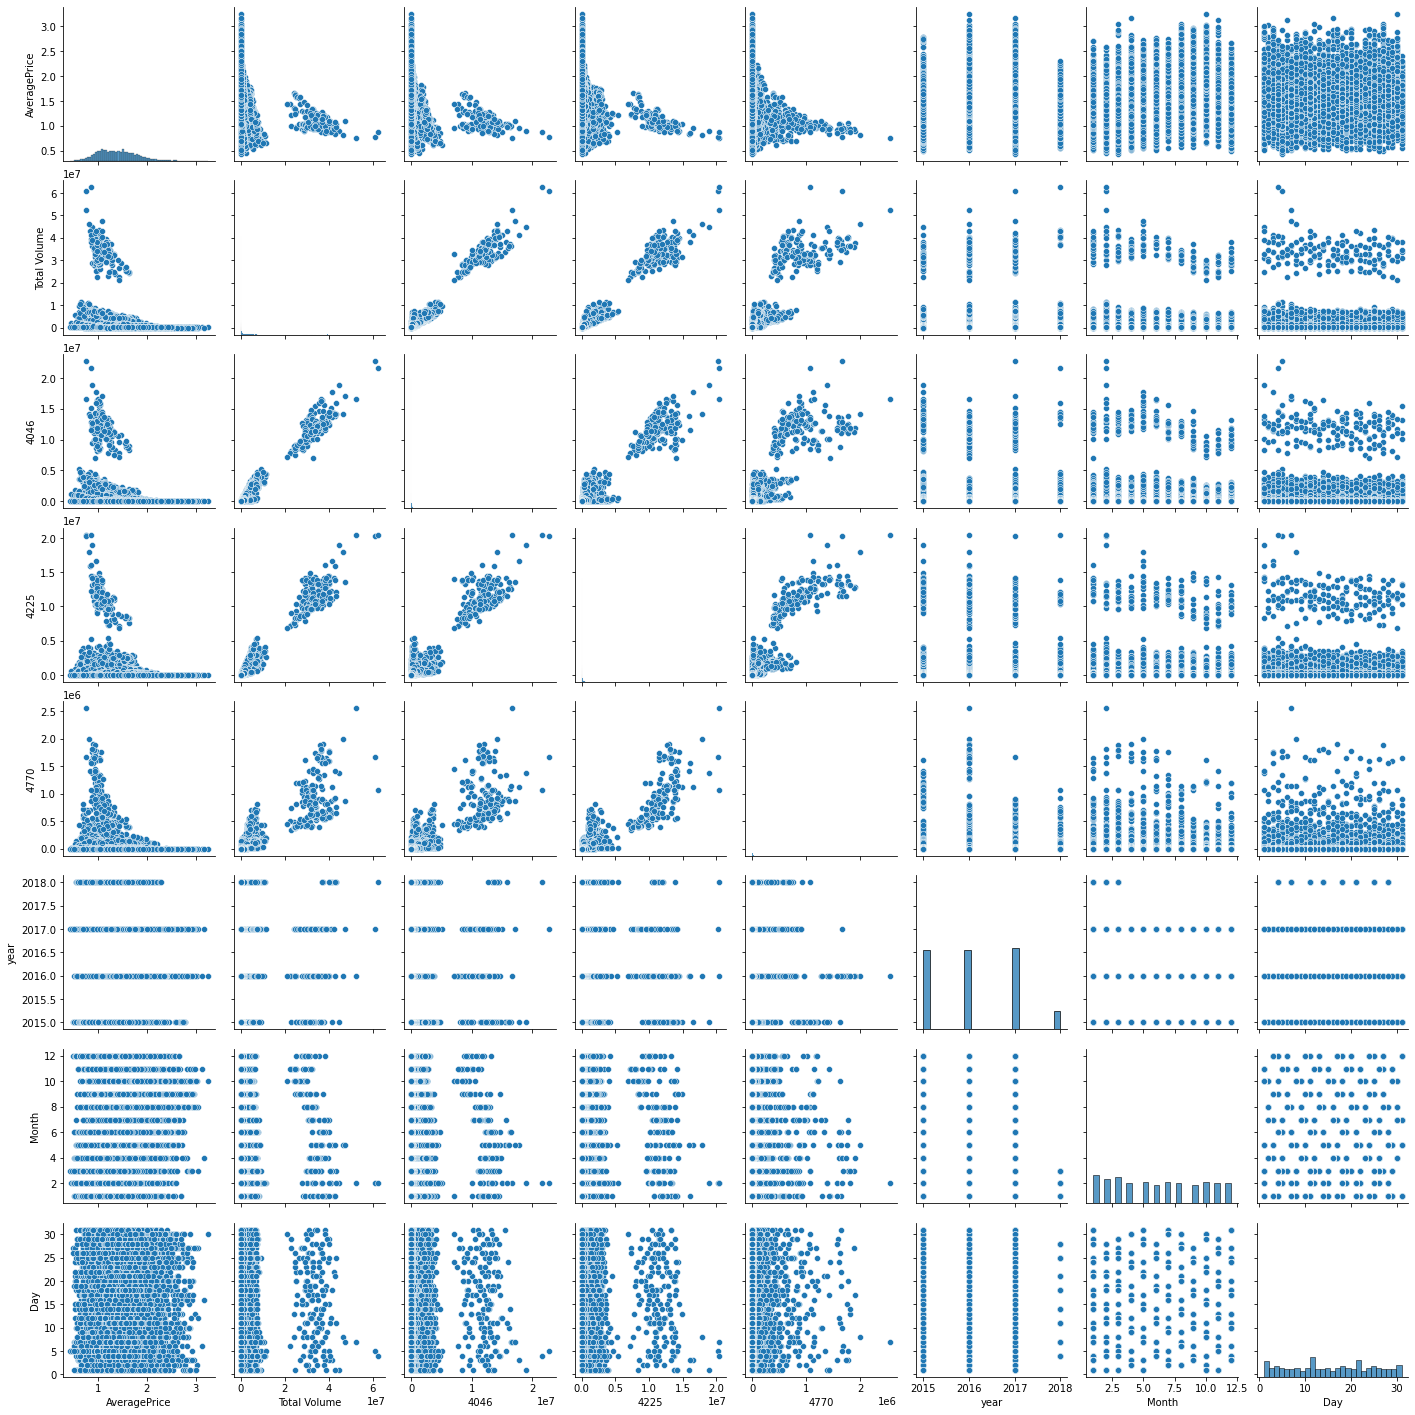

In [29]:
plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

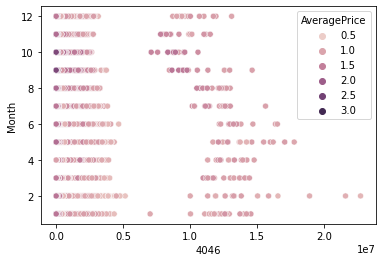

In [30]:
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=df)
plt.show()

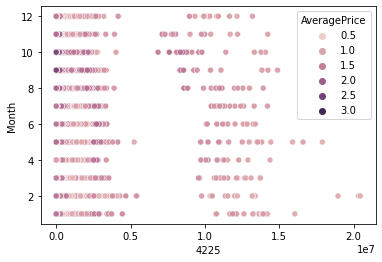

In [31]:
sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=df)
plt.show()

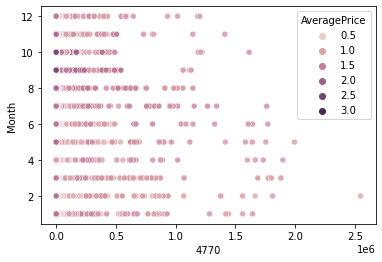

In [32]:
sns.scatterplot(x = "4770", y = "Month",hue='AveragePrice',data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

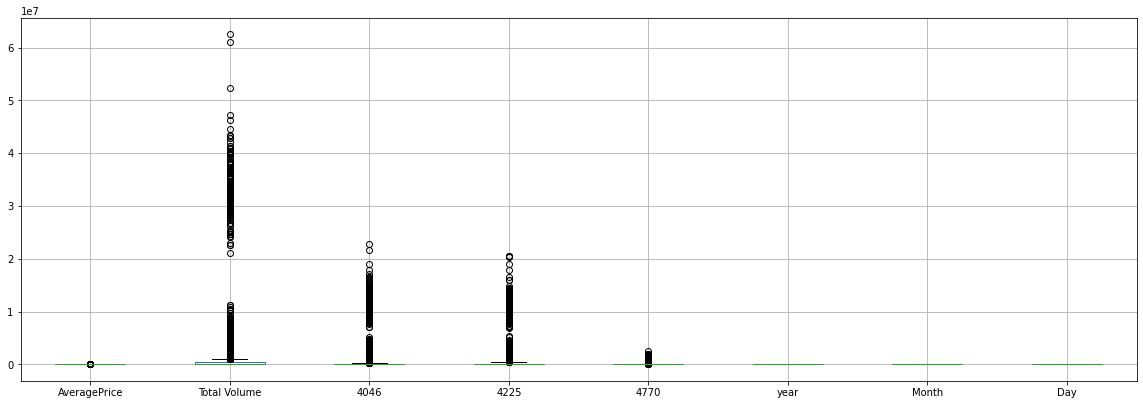

In [33]:
df_nc.iloc[:,0:10].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show

In [34]:
(np.abs(zscore(df_nc))<3).all()

AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
year             True
Month            True
Day              True
dtype: bool

In [35]:
(np.abs(zscore(df_nc))<3).all().all()

False

In [36]:
z=np.abs(zscore(df_nc))
threshold=3
np.where(z>3)

(array([  346,   359,   783,   787,   788,   790,   791,   792,   794,
          795,   796,   797,   799,   803,   805,   807,   808,   809,
          812,   816,   820,   823,   827,  1334,  1347,  1516,  1518,
         1541,  2340,  2341,  2348,  2351,  2368,  2370,  2652,  2652,
         2652,  2652,  2653,  2653,  2653,  2653,  2654,  2654,  2654,
         2654,  2655,  2655,  2655,  2655,  2656,  2656,  2656,  2656,
         2657,  2657,  2657,  2657,  2658,  2658,  2658,  2658,  2659,
         2659,  2659,  2659,  2660,  2660,  2660,  2660,  2661,  2661,
         2661,  2661,  2662,  2662,  2662,  2662,  2663,  2663,  2663,
         2663,  2664,  2664,  2664,  2664,  2665,  2665,  2665,  2665,
         2666,  2666,  2666,  2666,  2667,  2667,  2667,  2667,  2668,
         2668,  2668,  2668,  2669,  2669,  2669,  2669,  2670,  2670,
         2670,  2670,  2671,  2671,  2671,  2671,  2672,  2672,  2672,
         2672,  2673,  2673,  2673,  2673,  2674,  2674,  2674,  2674,
      

In [137]:
df1=df[(z<3).all(axis=1)]
df1

,AveragePrice,Total Volume,4046,4225,4770,type,year,Month,Day
0,1.33,-0.089199,-0.665133,0.329765,-0.239857,0,2015,12,27
1,1.35,-0.160333,-0.783843,0.249165,-0.192940,0,2015,12,20
2,0.93,0.187067,-0.738821,0.622549,0.004556,0,2015,12,13
3,1.08,0.004321,-0.640539,0.445178,-0.139352,0,2015,12,6
4,1.28,-0.193052,-0.691967,0.241895,-0.128769,0,2015,11,29
...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.685258,-0.471783,-0.932174,-1.234221,1,2018,2,4
18245,1.71,-0.777693,-0.626106,-0.678922,-1.234221,1,2018,1,28
18246,1.87,-0.781615,-0.626054,-0.786230,0.423616,1,2018,1,21
18247,1.93,-0.708660,-0.555812,-0.724266,0.423307,1,2018,1,14


In [38]:
df.shape

(18249, 10)

In [39]:
df1.shape

(17838, 10)

In [40]:
Data_loss=((18249-17838)/18249)*100

In [41]:
Data_loss

2.25217820154529

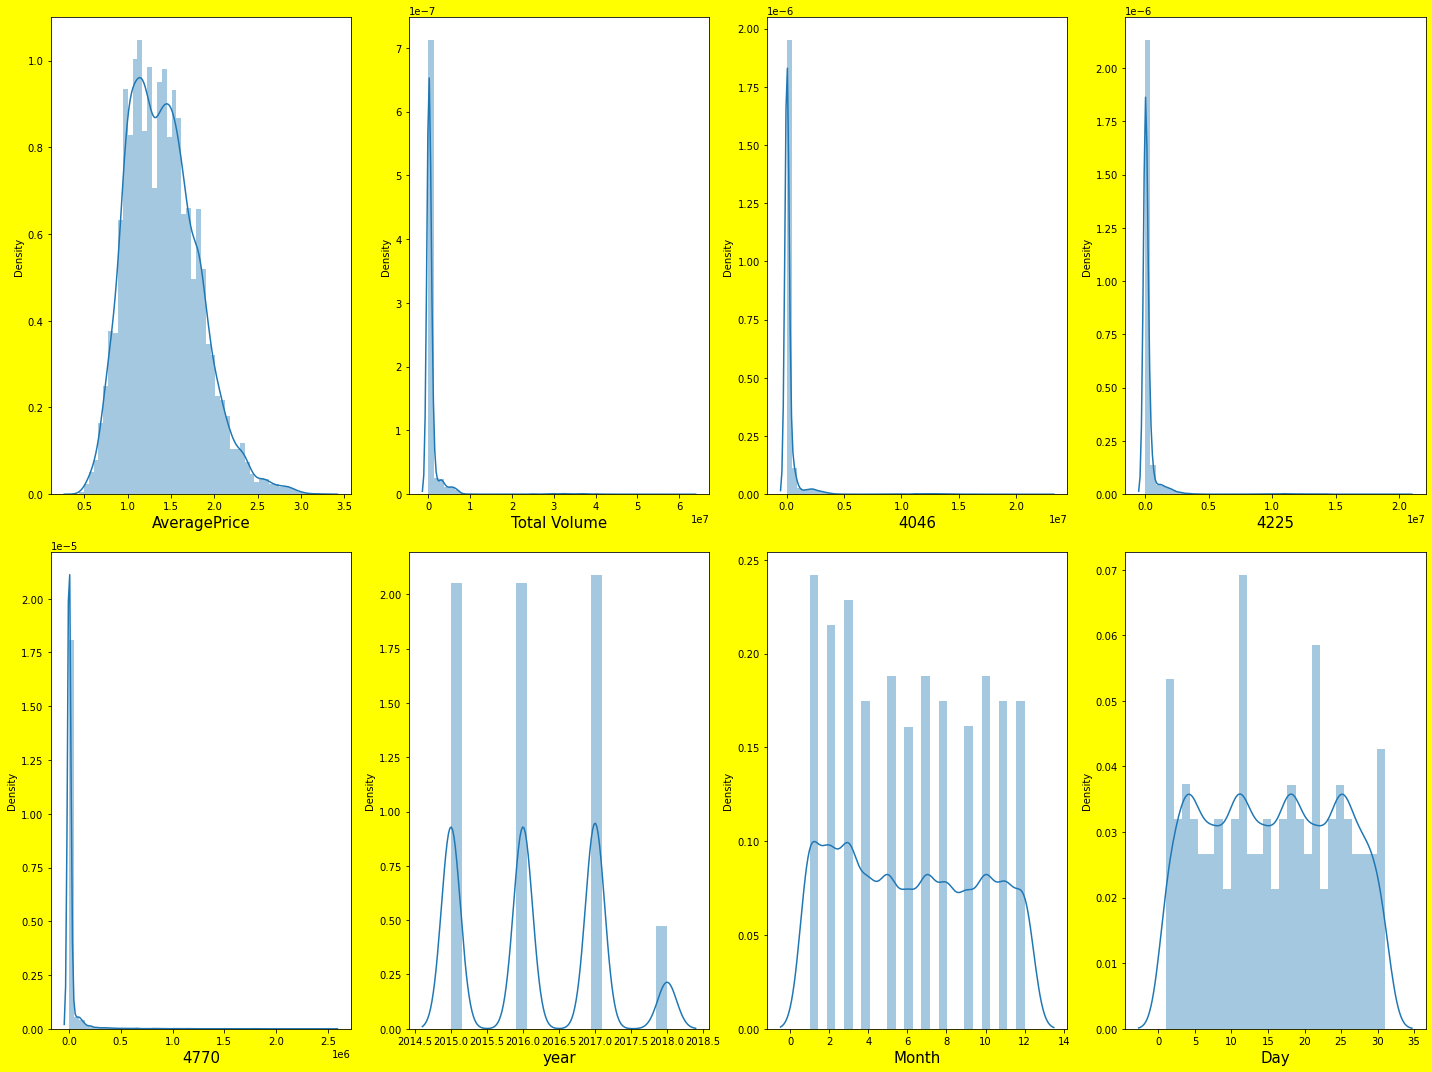

In [42]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df_nc:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    
    plotnumber+=1
plt.tight_layout()

In [43]:
df1.skew()

AveragePrice    0.385429
Total Volume    3.661159
4046            4.422120
4225            4.104196
4770            4.759495
year            0.221195
Month           0.111748
Day             0.012527
dtype: float64

In [44]:
df1.skew().sort_values(ascending=False)

4770            4.759495
4046            4.422120
4225            4.104196
Total Volume    3.661159
AveragePrice    0.385429
year            0.221195
Month           0.111748
Day             0.012527
dtype: float64

In [45]:
df1.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [46]:
f= ['Total Volume', '4046', '4225', '4770']

In [47]:
sk = PowerTransformer(method='yeo-johnson')

In [48]:
df1[f] = sk.fit_transform(df1[f].values)
df1[f].head()

,Total Volume,4046,4225,4770
0,-0.089199,-0.665133,0.329765,-0.239857
1,-0.160333,-0.783843,0.249165,-0.192940
2,0.187067,-0.738821,0.622549,0.004556
3,0.004321,-0.640539,0.445178,-0.139352
4,-0.193052,-0.691967,0.241895,-0.128769


In [49]:
df1.skew()

AveragePrice    0.385429
Total Volume   -0.004873
4046           -0.037293
4225           -0.044029
4770            0.021469
year            0.221195
Month           0.111748
Day             0.012527
dtype: float64

In [50]:
df1.skew().sort_values(ascending=False)

AveragePrice    0.385429
year            0.221195
Month           0.111748
4770            0.021469
Day             0.012527
Total Volume   -0.004873
4046           -0.037293
4225           -0.044029
dtype: float64

In [51]:
np.abs(3)

3

In [52]:
df1.skew()[np.abs(df1.skew())>0.044].all()

True

In [53]:
le = LabelEncoder()
df_cc= ["type","region"]
df1[df_cc]= df1[df_cc].apply(le.fit_transform)
df1[df_cc]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


In [54]:
corr = df1.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
AveragePrice,1.000000,-0.584074,-0.558709,-0.460245,-0.499235,0.615877,0.083923,-0.012867,0.152044,0.027213
Total Volume,-0.584074,1.000000,0.892857,0.926705,0.822982,-0.800165,0.095372,0.081261,-0.026489,-0.007152
4046,-0.558709,0.892857,1.000000,0.772361,0.743974,-0.726975,0.017223,0.171682,-0.026427,-0.005863
4225,-0.460245,0.926705,0.772361,1.000000,0.802527,-0.749138,0.013693,0.045668,-0.026244,-0.006891
4770,-0.499235,0.822982,0.743974,0.802527,1.000000,-0.782166,-0.036771,0.050089,-0.017272,0.000714
type,0.615877,-0.800165,-0.726975,-0.749138,-0.782166,1.000000,-0.004302,0.010912,-0.006970,-0.001838
year,0.083923,0.095372,0.017223,0.013693,-0.036771,-0.004302,1.000000,-0.001074,-0.177848,0.004808
region,-0.012867,0.081261,0.171682,0.045668,0.050089,0.010912,-0.001074,1.000000,-0.002006,-0.001411
Month,0.152044,-0.026489,-0.026427,-0.026244,-0.017272,-0.006970,-0.177848,-0.002006,1.000000,0.011562
Day,0.027213,-0.007152,-0.005863,-0.006891,0.000714,-0.001838,0.004808,-0.001411,0.011562,1.000000


<AxesSubplot:>

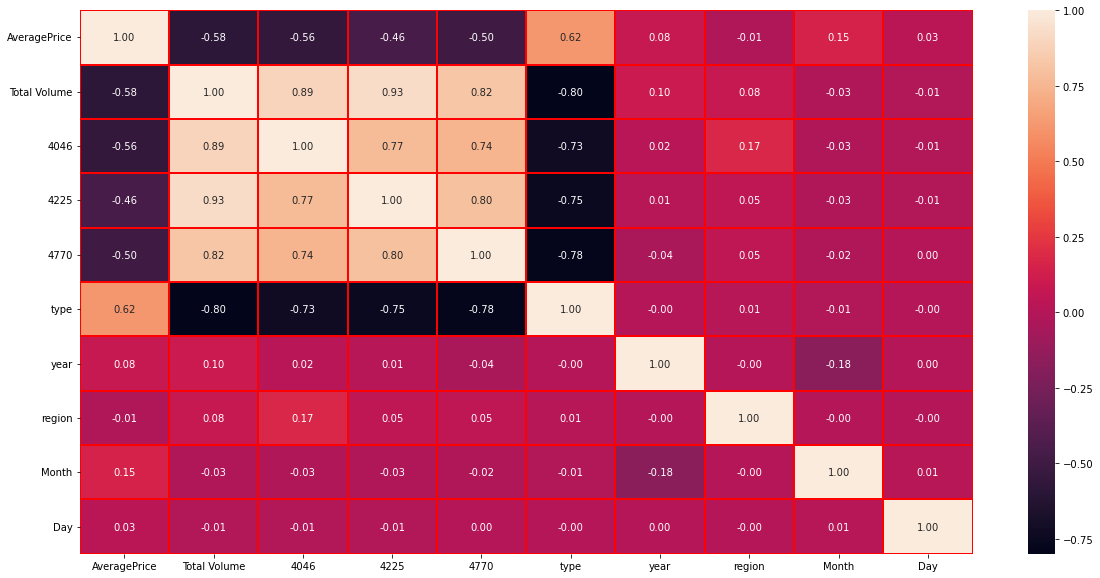

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True, linewidths = 0.1, linecolor = "red", fmt = "0.2f")

In [56]:
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.615877
Month           0.152044
year            0.083923
Day             0.027213
region         -0.012867
4225           -0.460245
4770           -0.499235
4046           -0.558709
Total Volume   -0.584074
Name: AveragePrice, dtype: float64

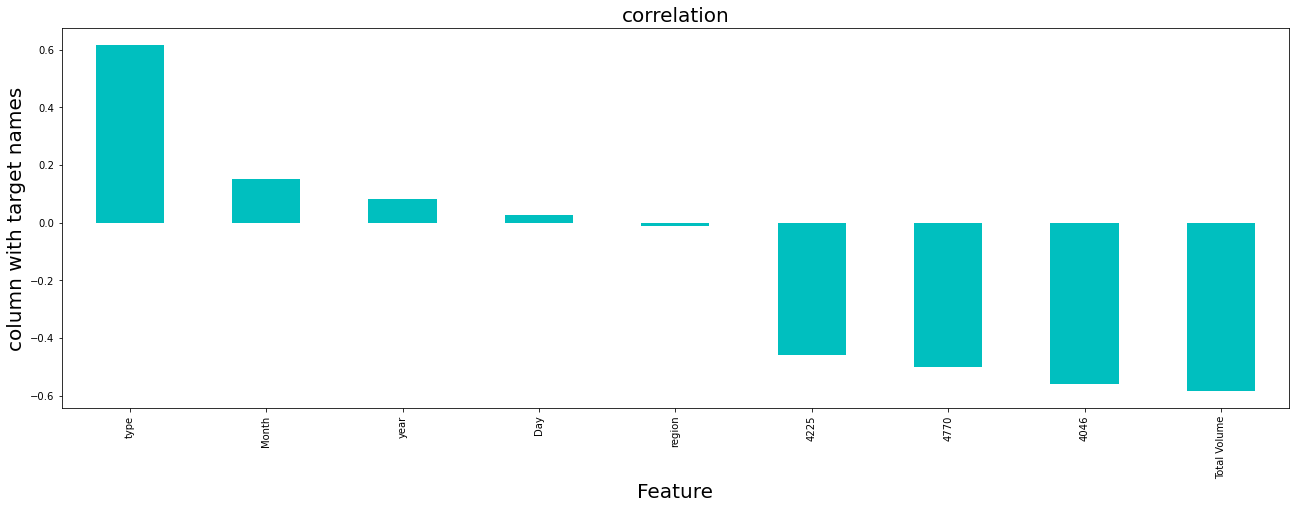

In [57]:
plt.figure(figsize=(22,7))
df1.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('column with target names', fontsize = 20)
plt.title('correlation', fontsize = 20)
plt.show()

In [58]:
df1.drop("region",axis=1, inplace=True)

In [59]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,Month,Day
0,1.33,-0.089199,-0.665133,0.329765,-0.239857,0,2015,12,27
1,1.35,-0.160333,-0.783843,0.249165,-0.192940,0,2015,12,20
2,0.93,0.187067,-0.738821,0.622549,0.004556,0,2015,12,13
3,1.08,0.004321,-0.640539,0.445178,-0.139352,0,2015,12,6
4,1.28,-0.193052,-0.691967,0.241895,-0.128769,0,2015,11,29


In [60]:
df1_clasffication = df1
df1_clasffication.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type', 'year',
       'Month', 'Day'],
      dtype='object')

In [61]:
df1_clasffication.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,Month,Day
0,1.33,-0.089199,-0.665133,0.329765,-0.239857,0,2015,12,27
1,1.35,-0.160333,-0.783843,0.249165,-0.192940,0,2015,12,20
2,0.93,0.187067,-0.738821,0.622549,0.004556,0,2015,12,13
3,1.08,0.004321,-0.640539,0.445178,-0.139352,0,2015,12,6
4,1.28,-0.193052,-0.691967,0.241895,-0.128769,0,2015,11,29


In [62]:
x = df1.drop("AveragePrice", axis=1)
y = df1["AveragePrice"]

In [63]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,type,year,Month,Day
0,-0.089199,-0.665133,0.329765,-0.239857,-1.008219,-1.217157,1.648046,1.290429
1,-0.160333,-0.783843,0.249165,-0.192940,-1.008219,-1.217157,1.648046,0.492341
2,0.187067,-0.738821,0.622549,0.004556,-1.008219,-1.217157,1.648046,-0.305746
3,0.004321,-0.640539,0.445178,-0.139352,-1.008219,-1.217157,1.648046,-1.103834
4,-0.193052,-0.691967,0.241895,-0.128769,-1.008219,-1.217157,1.365372,1.518454
...,...,...,...,...,...,...,...,...
17833,-0.685258,-0.471783,-0.932174,-1.234221,0.991848,1.971199,-1.178697,-1.331859
17834,-0.777693,-0.626106,-0.678922,-1.234221,0.991848,1.971199,-1.461372,1.404442
17835,-0.781615,-0.626054,-0.786230,0.423616,0.991848,1.971199,-1.461372,0.606354
17836,-0.708660,-0.555812,-0.724266,0.423307,0.991848,1.971199,-1.461372,-0.191734


In [64]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

In [65]:
vif

,VIF values,Features
0,19.336672,Total Volume
1,5.875242,4046
2,8.801697,4225
3,3.790832,4770
4,3.222116,type
5,1.183318,year
6,1.039439,Month
7,1.000503,Day


In [66]:
x.drop("Total Volume",axis=1, inplace=True)

In [67]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

In [68]:
vif

,VIF values,Features
0,2.952206,4046
1,3.645009,4225
2,3.735215,4770
3,3.071509,type
4,1.041969,year
5,1.036231,Month
6,1.000419,Day


In [69]:
maxAcc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    mod = KNeighborsRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is ",maxAcc," on Random_state ",maxRS)

Maximum r2 score is  0.6471160434028762  on Random_state  144


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=144)

In [71]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfrpred=rfr.predict(x_test)
print('R2_Score:',r2_score(y_test,rfrpred))
print('MAE:',mean_absolute_error(y_test, rfrpred))
print('MSE:',mean_squared_error(y_test, rfrpred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, rfrpred)))
print("Cross_Validaton_Score",cross_val_score(rfr,x,y,cv=5).mean())

R2_Score: 0.7783269900695857
MAE: 0.12478915358744391
MSE: 0.03364619042320626
RMSE: 0.18342897923503326
Cross_Validaton_Score 0.09930565227150209


In [72]:
svr = SVR()
svr.fit(x_train,y_train)
svrpred=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,svrpred))
print('MAE:',mean_absolute_error(y_test, svrpred))
print('MSE:',mean_squared_error(y_test, svrpred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, svrpred)))
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.6315336375530554
MAE: 0.17425206381259553
MSE: 0.05592692317088019
RMSE: 0.23648873793667255
Cross_Validaton_Score 0.06700129265848709


In [73]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,lrpred))
print('MAE:',mean_absolute_error(y_test, lrpred))
print('MSE:',mean_squared_error(y_test, lrpred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, lrpred)))
print("Cross_Validaton_Score",cross_val_score(lr,x,y,cv=5).mean())

R2_score: 0.4736398988406837
MAE: 0.21951030789234105
MSE: 0.07989250563405915
RMSE: 0.28265262361078336
Cross_Validaton_Score 0.09084717924039645


In [74]:
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
sgdpred=sgd.predict(x_test)
print('R2_Score:',r2_score(y_test,sgdpred))
print('MAE:',mean_absolute_error(y_test, sgdpred))
print('MSE:',mean_squared_error(y_test, sgdpred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, sgdpred)))
print("Cross_Validaton_Score",cross_val_score(sgd,x,y,cv=5).mean())

R2_Score: 0.47418143843391836
MAE: 0.21988452641514894
MSE: 0.07981030913985628
RMSE: 0.282507184226979
Cross_Validaton_Score 0.09419888745689986


In [75]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,knnpred))
print('MAE:',mean_absolute_error(y_test, knnpred))
print('MSE:',mean_squared_error(y_test, knnpred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, knnpred)))
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.6471160434028762
MAE: 0.16882567264573992
MSE: 0.053561779147982054
RMSE: 0.2314341788673014
Cross_Validaton_Score 0.11165019267531806


In [76]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,gbpred))
print('MAE:',mean_absolute_error(y_test, gbpred))
print('MSE:',mean_squared_error(y_test, gbpred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, gbpred)))
print("Cross_Validaton_Score",cross_val_score(gb,x,y,cv=5).mean())

R2_Score: 0.639929568929406
MAE: 0.17460221616714175
MSE: 0.05465256367191572
RMSE: 0.23377887772832626
Cross_Validaton_Score 0.24378381251672562


In [77]:
parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
            'max_features' : ['auto', 'sqrt', 'log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
}
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [78]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'huber',
 'max_features': 'auto'}

In [79]:
GCV.best_estimator_

GradientBoostingRegressor(learning_rate=0.5, loss='huber', max_features='auto')

In [80]:
gcvpred1=GCV.best_estimator_.predict(x_test)
GCV.best_estimator_.score(x_train,y_train)

0.7123421456036655

In [81]:
final_model=GradientBoostingRegressor(max_depth=4)

In [82]:
final_model.fit(x_test,y_test)
pred=final_model.predict(x_test)
final_model.fit(x_train,y_train)
pred1=final_model.predict(x_train)

In [83]:
print("Test Accuracy=",final_model.score(x_test,y_test))
print("Train Accuracy=",final_model.score(x_train,y_train))

Test Accuracy= 0.6757181887840791
Train Accuracy= 0.6817616806125701


In [84]:
joblib.dump(final_model,"Avocado Project(average price).pkl")

['Avocado Project(average price).pkl']

In [85]:
model=joblib.load("Avocado Project(average price).pkl")
Prediction = model.predict(x_test)
Prediction

array([1.58207797, 1.07388873, 1.87366963, ..., 1.70051887, 1.14654069,
       1.11834633])

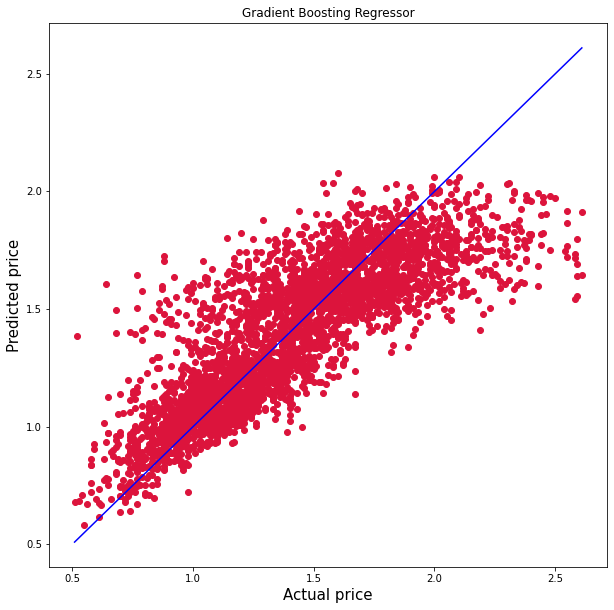

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Prediction, c='crimson')
plt1 = max(max(Prediction), max(y_test))
plt2 = min(min(Prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("Gradient Boosting Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

In [87]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':Prediction},index=range(len(a)))
result


,Original,Predicted
0,1.72,1.582078
1,1.33,1.073889
2,2.15,1.873670
3,1.07,1.046816
4,1.12,1.075594
...,...,...
3563,1.73,1.706259
3564,1.77,1.647374
3565,1.58,1.700519
3566,1.36,1.146541


# Classification Problem

In [123]:
df1_clasffication

,AveragePrice,Total Volume,4046,4225,4770,type,year,Month,Day
0,1.33,-0.089199,-0.665133,0.329765,-0.239857,0,2015,12,27
1,1.35,-0.160333,-0.783843,0.249165,-0.192940,0,2015,12,20
2,0.93,0.187067,-0.738821,0.622549,0.004556,0,2015,12,13
3,1.08,0.004321,-0.640539,0.445178,-0.139352,0,2015,12,6
4,1.28,-0.193052,-0.691967,0.241895,-0.128769,0,2015,11,29
...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.685258,-0.471783,-0.932174,-1.234221,1,2018,2,4
18245,1.71,-0.777693,-0.626106,-0.678922,-1.234221,1,2018,1,28
18246,1.87,-0.781615,-0.626054,-0.786230,0.423616,1,2018,1,21
18247,1.93,-0.708660,-0.555812,-0.724266,0.423307,1,2018,1,14


In [141]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type', 'year',
       'Month', 'Day'],
      dtype='object')

In [143]:
dff = pd.read_csv("/Users/aerryjoop/Downloads/avocado.csv")

In [145]:
dff.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [146]:
dff.drop(['Unnamed: 0', 'Date', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1,inplace=True)

In [147]:
dff.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type', 'year',
       'region'],
      dtype='object')

In [148]:
dff.shape

(18249, 8)

In [149]:
dff.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,2018.000000


In [150]:
dff.isnull().sum().sum()

0

In [152]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   type          18249 non-null  object 
 6   year          18249 non-null  int64  
 7   region        18249 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.1+ MB


In [156]:
categorical_col=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


In [157]:
numerical_col=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'year']


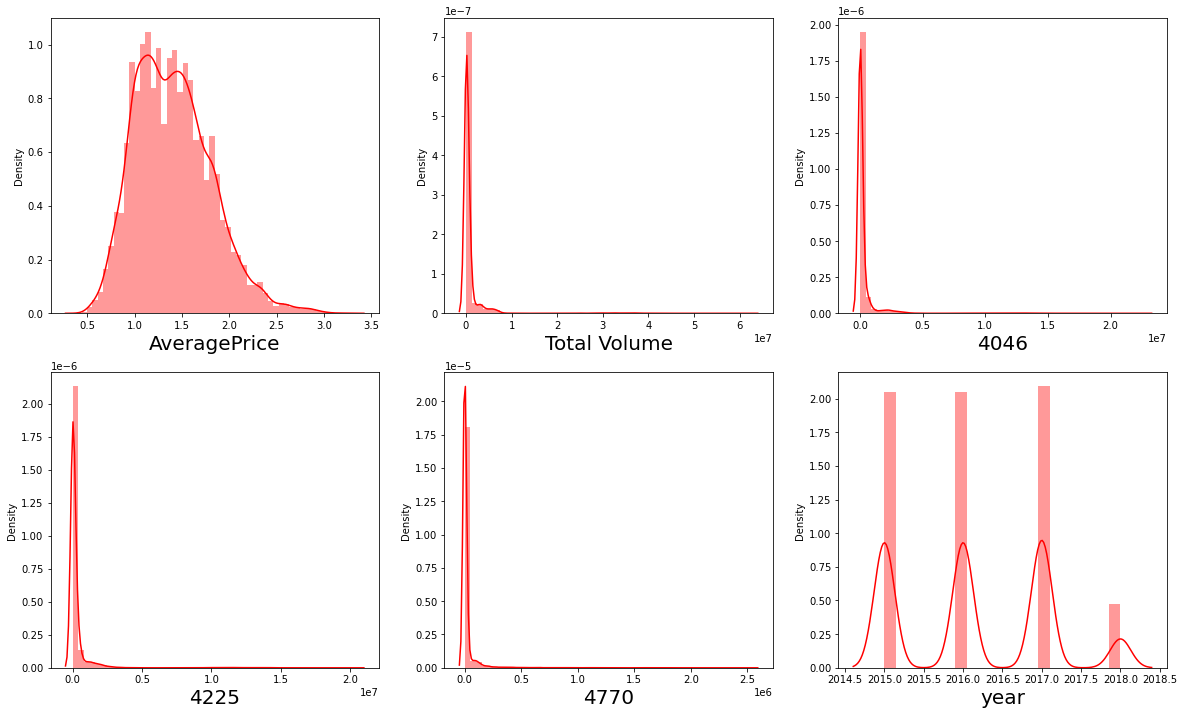

In [158]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(dff[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [161]:
dff.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
year             0.215339
dtype: float64

In [162]:
f = ['Total Volume', '4046', '4225', '4770']

In [163]:
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')

In [166]:
dff[f] = sk.fit_transform(dff[f].values)
dff[f].head()

,Total Volume,4046,4225,4770
0,-0.086605,-0.658619,0.307313,-0.247250
1,-0.155746,-0.776870,0.231647,-0.201041
2,0.179327,-0.731947,0.579503,-0.007072
3,0.003876,-0.634200,0.415100,-0.148322
4,-0.187640,-0.685293,0.224806,-0.137918


In [167]:
dff.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
year            0.215339
dtype: float64

In [168]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dff[categorical_col]= dff[categorical_col].apply(LE.fit_transform)
dff[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


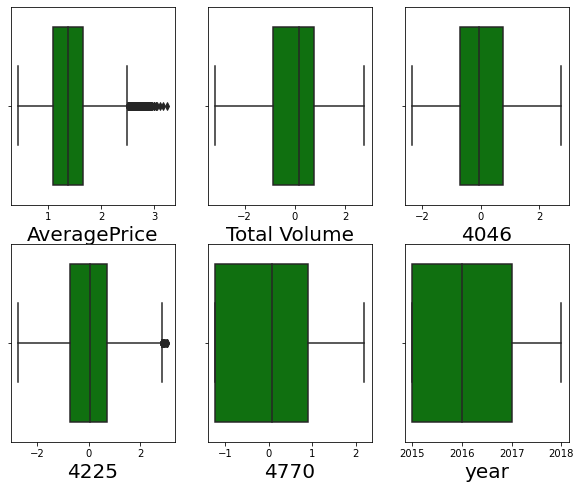

In [175]:
plt.figure(figsize=(10,8), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(dff[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [181]:
dff.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type', 'year',
       'region'],
      dtype='object')

In [186]:
x = dff.drop("region", axis = 1)
x

,AveragePrice,Total Volume,4046,4225,4770,type,year
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,0,2015
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,0,2015
2,0.93,0.179327,-0.731947,0.579503,-0.007072,0,2015
3,1.08,0.003876,-0.634200,0.415100,-0.148322,0,2015
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,0,2015
...,...,...,...,...,...,...,...
18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,1,2018
18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,1,2018
18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,1,2018
18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,1,2018


In [192]:
y = dff["region"]

In [193]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int64

In [194]:
y.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

In [195]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,24.131438,AveragePrice
1,17.972201,Total Volume
2,5.635035,4046
3,8.797893,4225
4,3.902903,4770
5,7.031315,type
6,21.356271,year


In [196]:
x.drop('AveragePrice',inplace=True,axis=1)

In [197]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,16.739732,Total Volume
1,5.634978,4046
2,8.157747,4225
3,3.901382,4770
4,6.362383,type
5,4.180758,year


In [198]:
x.drop('Total Volume',inplace=True,axis=1)

In [199]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.094792,4046
1,3.777951,4225
2,3.869423,4770
3,6.027012,type
4,4.012974,year


In [200]:
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,4046,4225,4770,type,year
0,-0.658619,0.307313,-0.247250,-0.999836,-1.221282
1,-0.776870,0.231647,-0.201041,-0.999836,-1.221282
2,-0.731947,0.579503,-0.007072,-0.999836,-1.221282
3,-0.634200,0.415100,-0.148322,-0.999836,-1.221282
4,-0.685293,0.224806,-0.137918,-0.999836,-1.221282
...,...,...,...,...,...
18244,-0.467366,-0.919470,-1.238310,1.000164,1.970504
18245,-0.619883,-0.665372,-1.238310,1.000164,1.970504
18246,-0.619831,-0.772496,0.401546,1.000164,1.970504
18247,-0.550282,-0.710543,0.401246,1.000164,1.970504


In [205]:
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is :',maxAccu,'Random state:',maxRS) 

Best accuracy is : 0.3098630136986301 Random state: 132


In [206]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=132)

In [207]:
x_train

,4046,4225,4770,type,year
2733,1.996350,1.888297,1.550997,-0.999836,-1.221282
6149,0.578441,-0.095001,0.527542,-0.999836,0.906575
11282,-0.324630,-0.486126,-1.238310,1.000164,-1.221282
7983,0.979505,0.492477,0.659312,-0.999836,0.906575
14036,-0.537783,-0.492905,-1.238310,1.000164,-0.157353
...,...,...,...,...,...
12258,0.078732,0.423653,-0.601912,1.000164,-0.157353
12390,-1.250585,0.070617,-1.238310,1.000164,-0.157353
6314,0.702925,0.194548,0.975878,-0.999836,0.906575
18098,-0.683897,-0.308690,-1.238310,1.000164,1.970504


In [208]:
x_test

,4046,4225,4770,type,year
14096,-0.461270,-0.292114,-0.782502,1.000164,-0.157353
10029,-0.582821,-0.828234,-0.896717,1.000164,-1.221282
5819,0.357816,-0.529623,1.036549,-0.999836,0.906575
13688,-0.125923,-0.821167,-1.238310,1.000164,-0.157353
4091,1.222517,0.880122,0.334325,-0.999836,-0.157353
...,...,...,...,...,...
13348,-0.983893,-2.448570,-1.238310,1.000164,-0.157353
12753,-0.336431,0.431641,-0.730344,1.000164,-0.157353
15927,0.021755,-0.126817,-1.238310,1.000164,0.906575
150,0.621495,1.263919,1.297576,-0.999836,-1.221282


In [209]:
y_train

2733     52
6149     10
11282    41
7983     44
14036    40
         ..
12258     6
12390     8
6314     13
18098    41
12369     8
Name: region, Length: 14599, dtype: int64

In [210]:
y_test

14096    41
10029    17
5819      3
13688    33
4091     24
         ..
13348    27
12753    15
15927    22
150       2
11549    46
Name: region, Length: 3650, dtype: int64

In [211]:
print('x_train shape=',x_train.shape)
print('x_test shape=',x_train.shape)
print('y_train shape=',y_train.shape)
print('y_test shape=',y_test.shape)

x_train shape= (14599, 5)
x_test shape= (14599, 5)
y_train shape= (14599,)
y_test shape= (3650,)


In [212]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [213]:
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [214]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.3098630136986301
[[ 7  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  4 67  0]
 [ 0 13  0 ...  0  0  9]]
              precision    recall  f1-score   support

           0       0.16      0.11      0.13        66
           1       0.18      0.38      0.25        68
           2       0.39      0.54      0.45        65
           3       0.29      0.38      0.33        65
           4       0.24      0.30      0.27        57
           5       0.33      0.40      0.36        55
           6       0.57      0.66      0.61        70
           7       0.29      0.60      0.39        60
           8       0.33      0.46      0.38        67
           9       0.12      0.08      0.10        61
          10       0.11      0.08      0.09        64
          11       0.47      0.23      0.30        71
          12       0.05      0.03      0.04        70
          13       0.00  

In [215]:
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.01852156288097626
cross validation score of GaussianNB() is = 0.010191888921585701
cross validation score of SVC() is = 0.005589107156798568
cross validation score of DecisionTreeClassifier() is = 0.021151705872814737
cross validation score of KNeighborsClassifier() is = 0.01846676235489121
cross validation score of RandomForestClassifier() is = 0.021754445598842133
cross validation score of GradientBoostingClassifier() is = 0.023891431900211996
cross validation score of AdaBoostClassifier() is = 0.018576357401524204
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.16932434653953643
cross validation score of GaussianNB() is = 0.02219299687654118
cross validation score of SVC() is = 0.3602937147240945
cross validation score of DecisionTreeClassifier() is = 0.39382979889308994
cross validation score of KNeigh

In [216]:
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=8,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [217]:
gcv1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [218]:
final_model=gcv1.best_estimator_

In [219]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))

Test Accuracy score of final model = 0.6789041095890411
Train Accuracy score of final model = 0.7222412494006438


In [220]:
joblib.dump(final_model,"Avocado Project(region).pkl")

['Avocado Project(region).pkl']

In [221]:
model=joblib.load("Avocado Project(region).pkl")
Prediction = model.predict(x_test)
Prediction

array([36, 40,  3, ..., 22,  2, 46])

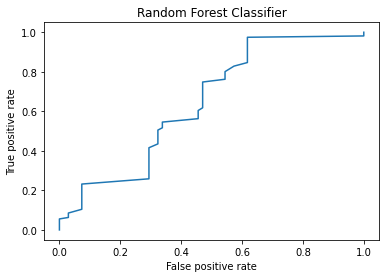

In [224]:
tpr,fpr,thresholds = roc_curve(y_test,Prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

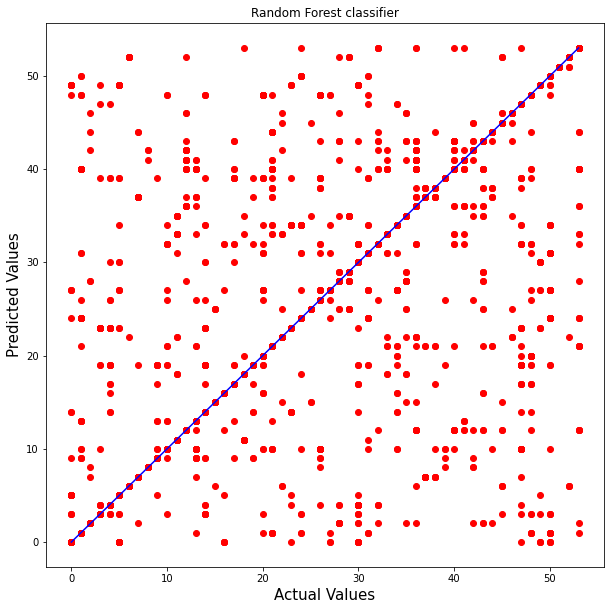

In [227]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Prediction, c='r')
plt1 = max(max(Prediction), max(y_test))
plt2 = min(min(Prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()